In [19]:
# load berbagai library yang diperlukan
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [20]:
# Kita akan unduh dari kumpulan dataset di laman github
!wget -O iris.csv https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv

--2021-10-11 14:58:57--  https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4761 (4.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.65K  --.-KB/s    in 0s      

2021-10-11 14:58:57 (46.4 MB/s) - ‘iris.csv’ saved [4761/4761]



In [21]:
# Load Dataset
df = pd.read_csv('iris.csv')
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm        Label
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [22]:
# menampilkan jumlah data per label
df['Label'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Label, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d12376750>]],
      dtype=object)

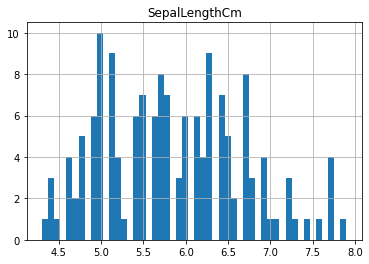

In [23]:
# menampilkan histogram dari data
df.hist(column='SepalLengthCm', bins=50)

In [24]:
# format dataset, yaitu bentuk feature sets (kumpulan atribut), kita bentuk variabel X
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Label'],
      dtype='object')

In [25]:
# Untuk menggunakan library scikit-learn library, kita harus convert format data frame-nya Panda, ke array Numpy
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] .values  #.astype(float)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [26]:
# Mendefinisikan Labelnya juga (Y)
y = df['Label'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [27]:
# normalisasi data agar perhitungan jarak menjadi lebih valid
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [28]:
# Pembagian Data Training dan Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [29]:
# Import classifier K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#Training
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [31]:
# memprediksikan data
yhat = knn.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [32]:
# Perhitungan Akurasi
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333


In [33]:
# Performa dari model KNN sangat bergantung dengan nilai K, untuk melakukan pengujian nilai k dari k=1 s.d k=10
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

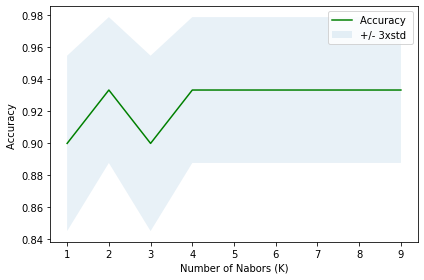

In [34]:
# menampilkan grafik / plot-nya
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [35]:
# OUTPUT Akurasi terbaik 
print( "Akurasi terbaik adalah", mean_acc.max(), "dengan nilai k=", mean_acc.argmax()+1)

Akurasi terbaik adalah 0.9333333333333333 dengan nilai k= 2
